# Data Preprocessing & EDA on Insurance Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA

<Axes: xlabel='age', ylabel='Count'>

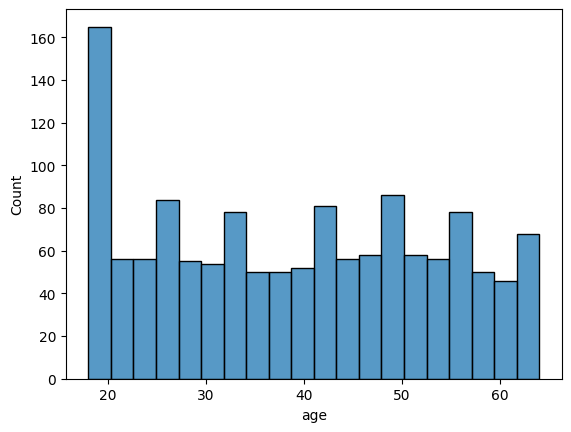

In [ ]:
sns.histplot(df['age'], bins = 20)

<Axes: xlabel='bmi', ylabel='Count'>

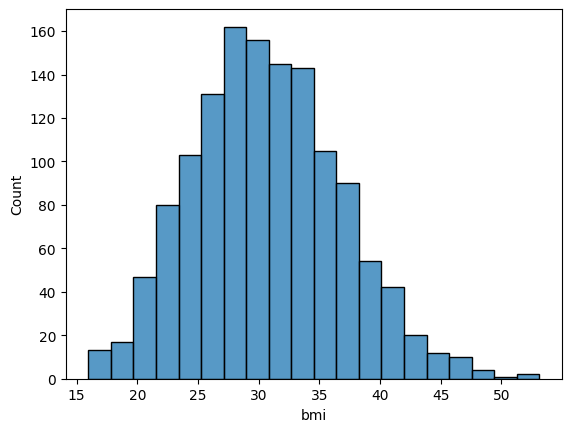

In [ ]:
sns.histplot(df['bmi'], bins = 20)

<Axes: xlabel='age', ylabel='Density'>

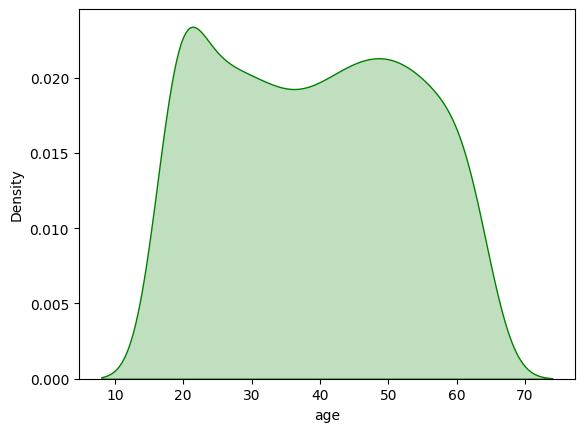

In [ ]:
sns.kdeplot(df['age'], fill = True, color = "Green")

<Axes: xlabel='charges', ylabel='Count'>

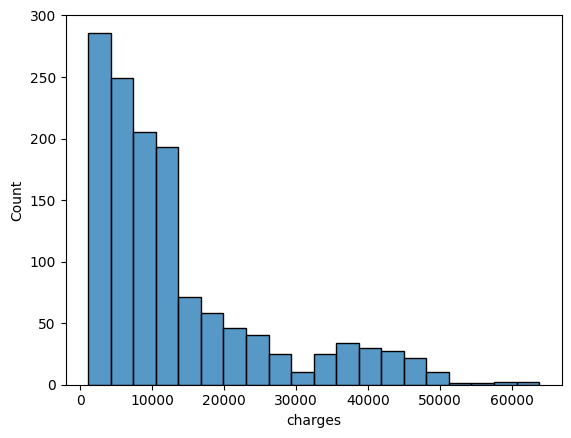

In [ ]:
sns.histplot(df['charges'], bins = 20)

<Axes: xlabel='charges', ylabel='Density'>

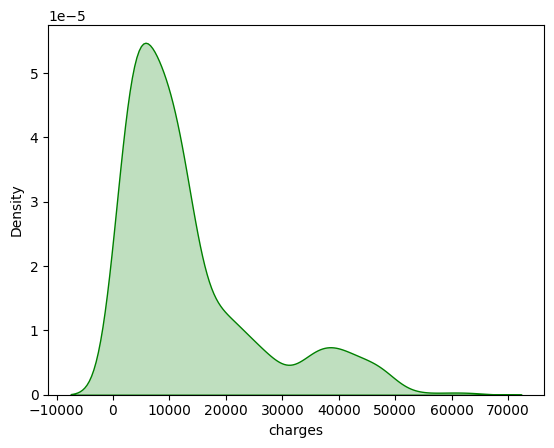

In [ ]:
sns.kdeplot(df['charges'], fill= True, color= "green")

## categorical columns

In [ ]:
cat_cols = ["sex", "smoker", 'region']
for col in cat_cols:
    print(df[col].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


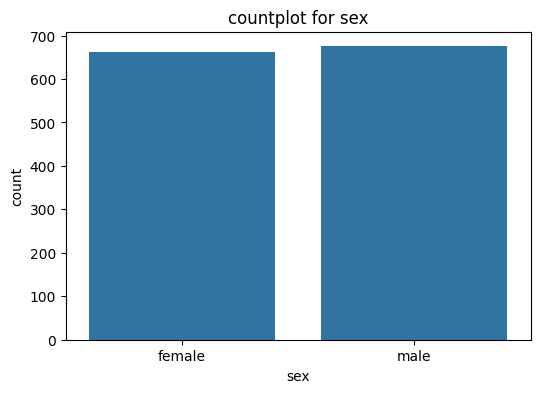

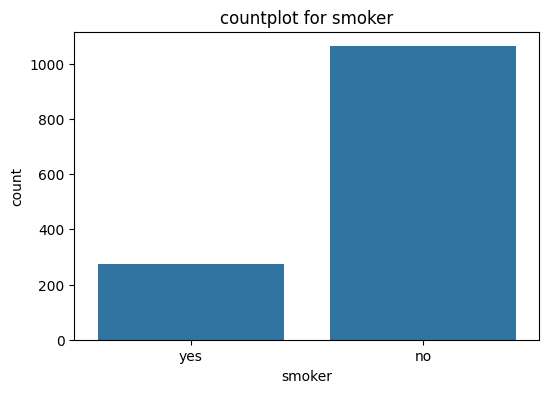

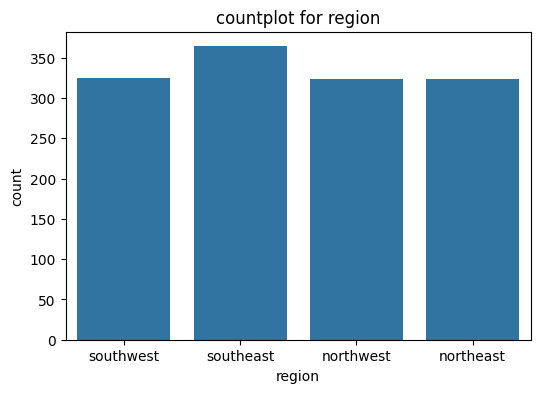

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x = col, data = df)
    plt.title(f"countplot for {col}")

<Axes: xlabel='smoker', ylabel='count'>

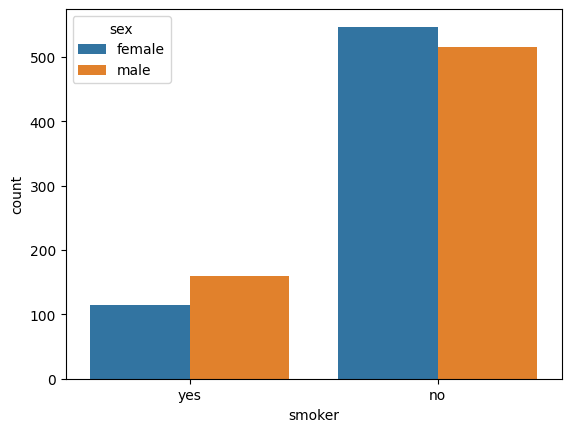

In [ ]:
sns.countplot(x = "smoker", hue = "sex", data = df)

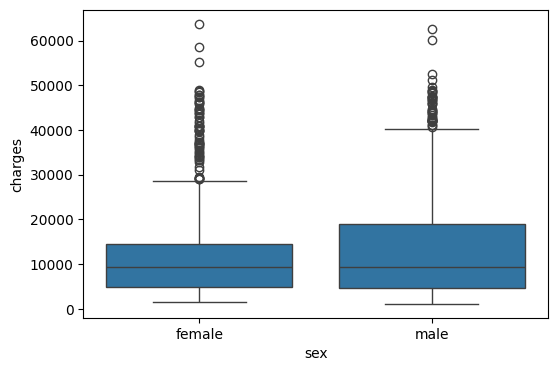

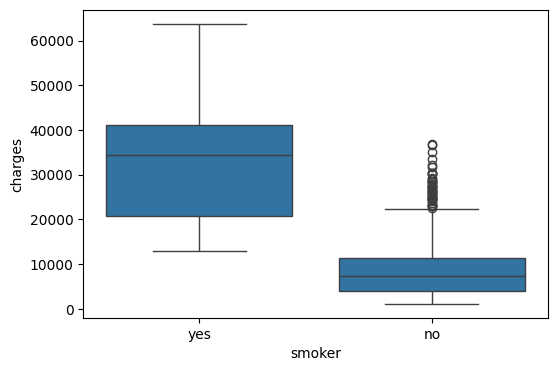

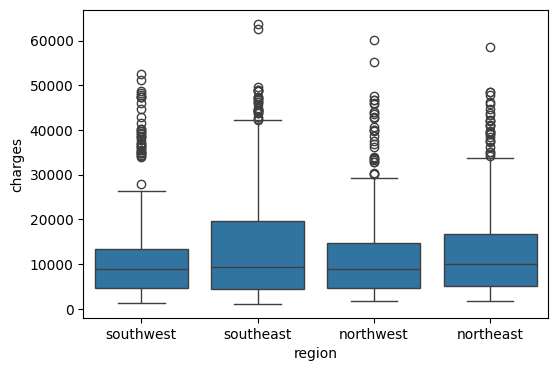

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = col, y ="charges", data = df)

<Axes: xlabel='children', ylabel='Count'>

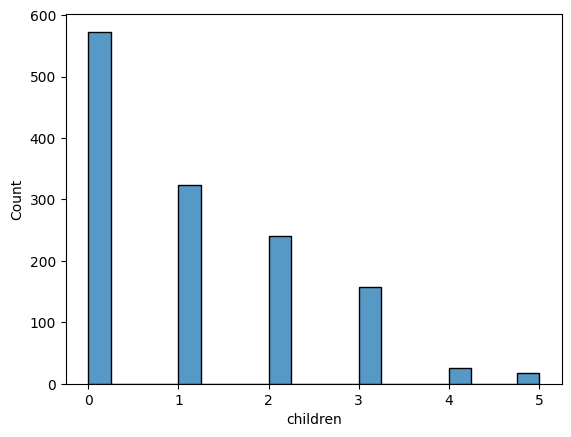

In [ ]:
sns.histplot(df['children'], bins = 20)

## One hot encoding

In [34]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [37]:
df_encoded = df_encoded.astype(int)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


## Scale / Normalize Numerical Features

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
cols = ['age', 'bmi', 'children']
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])

In [42]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.517949,-0.909234,16884,0,1,0,0,1
1,-1.511647,0.462463,-0.079442,1725,1,0,0,1,0
2,-0.799350,0.462463,1.580143,4449,1,0,0,1,0
3,-0.443201,-1.334960,-0.909234,21984,1,0,1,0,0
4,-0.514431,-0.354547,-0.909234,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,10600,1,0,1,0,0
1334,-1.511647,0.135659,-0.909234,2205,0,0,0,0,0
1335,-1.511647,0.952670,-0.909234,1629,0,0,0,1,0
1336,-1.297958,-0.844753,-0.909234,2007,0,0,0,0,1


## Data division

In [48]:
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## log transformation